## ACT Scores in California Schools

What factors affect high school students' ACT scores? Are ACT scores correlated with graduation rates? What about drop out rates? Are students' financial situations (poverty rate measured by proxy using free reduced meal program eligibility) correlated with ACT scores? 
<br>
<br>
This data was taken from the [California Dept. of Education website](https://www.cde.ca.gov/ds/) for the 2017-2018 school year.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
pov = pd.read_csv('poverty.csv')
act = pd.read_csv('act18.csv')
grad = pd.read_csv('grad.txt', sep='\t')

In [187]:
act.rename(columns={'sname':'School Name'}, inplace=True)
grad.rename(columns={'SchoolName' : 'School Name'}, inplace=True)

In [188]:
act.dropna(inplace = True, subset = ['School Name'])
pov.dropna(inplace=True, subset = ['School Name'])
grad.dropna(inplace=True, subset=['School Name'])

In [189]:
act.head()

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,year
0,,,Alameda,17476,4120,25,25,25,24,2879,69.88,2017-18
2,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,50.00,2017-18
3,California School for the Deaf-Fremont,California School for the Deaf-Fremont (State ...,Alameda,76,26,12,15,15,16,0,0.00,2017-18
5,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,16,27,28,27,26,15,93.75,2017-18
6,Nea Community Learning Center,Alameda Unified,Alameda,30,2,*,*,*,*,*,*,2017-18


In [190]:
from functools import reduce
data_frames = [act, pov, grad]
df = reduce(lambda  left,right: pd.merge(left,right,on=['School Name'],
                                            how='inner'), data_frames)

In [191]:
df.head()

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,0,0.0,0,0.0,0,0.0,3,5.2,1,1.7
1,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,0,0.0,0,0.0,1,3.4,1,3.4,1,3.4
2,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,*,*,*,*,*,*,*,*,*,*
3,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,0,0.0,0,0.0,0,0.0,1,2.9,1,2.9
4,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,0,0.0,0,0.0,1,2.3,3,7.0,1,2.3


In [192]:
df.drop_duplicates(subset='School Name', keep='first', inplace=True)

In [193]:
df = df[df['NumTstTakr'] > 0]

In [194]:
act.shape, pov.shape, grad.shape, df.shape

((1745, 12), (1708, 28), (194221, 34), (1043, 72))

In [195]:
df.head()

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,...,SPED Certificate (Count),SPED Certificate (Rate),GED Completer (Count),GED Completer (Rate),Other Transfer (Count),Other Transfer (Rate),Dropout (Count),Dropout (Rate),Still Enrolled (Count),Still Enrolled (Rate)
0,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,93,16,20,19,20,20,8,...,0,0.0,0,0.0,0,0.0,3,5.2,1,1.7
56,Alameda Science and Technology Institute,Alameda Unified,Alameda,44,16,27,28,27,26,15,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100,Alameda High,Alameda Unified,Alameda,447,137,27,27,26,26,120,...,3,1.5,0,0.0,0,0.0,1,0.5,0,0.0
220,Albany High,Albany City Unified,Alameda,269,91,29,29,28,27,85,...,1,0.7,0,0.0,0,0.0,4,2.7,1,0.7
288,REALM Charter High,Berkeley Unified,Alameda,86,7,*,*,*,*,*,...,0,0.0,0,0.0,0,0.0,1,2.5,1,2.5


In [196]:
cols = ['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

df['AvgScrTotal'] = df[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']].mean(axis=1)

In [202]:
# subset data; clean up unused columns
df = df[['School Name', 'dname', 'cname', 'enroll12', 'NumTstTakr', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'AvgScrTotal', 'NumGE21', 'PctGE21', 'Adult Ed. HS Diploma (Count)',
       'Adult Ed. HS Diploma (Rate)', 'AggregateLevel', 'County Name', 'District Name', 'Dropout (Count)', 'Dropout (Rate)',
        'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)', 'FRPM Count \n(Ages 5-17)', 'FRPM Count \n(K-12)', 'Free Meal \nCount \n(Ages 5-17)',
       'Free Meal \nCount \n(K-12)', 'GED Completer (Count)', 'GED Completer (Rate)', 'Golden State Seal Merit Diploma (Count)',
       'Golden State Seal Merit Diploma (Rate', "Met UC/CSU Grad Req's (Rate)",  'PctGE21', 'Percent (%) \nEligible FRPM \n(Ages 5-17)',
       'Percent (%) \nEligible FRPM \n(K-12)', 'Percent (%) \nEligible Free \n(Ages 5-17)','Percent (%) \nEligible Free \n(K-12)',
       'Regular HS Diploma Graduates (Count)','Regular HS Diploma Graduates (Rate)',
        ]]

In [203]:
df.columns.sort_values()

Index(['Adult Ed. HS Diploma (Count)', 'Adult Ed. HS Diploma (Rate)',
       'AggregateLevel', 'AvgScrEng', 'AvgScrMath', 'AvgScrRead', 'AvgScrSci',
       'AvgScrTotal', 'County Name', 'District Name', 'Dropout (Count)',
       'Dropout (Rate)', 'Enrollment \n(Ages 5-17)', 'Enrollment \n(K-12)',
       'FRPM Count \n(Ages 5-17)', 'FRPM Count \n(K-12)',
       'Free Meal \nCount \n(Ages 5-17)', 'Free Meal \nCount \n(K-12)',
       'GED Completer (Count)', 'GED Completer (Rate)',
       'Golden State Seal Merit Diploma (Count)',
       'Golden State Seal Merit Diploma (Rate', 'Met UC/CSU Grad Req's (Rate)',
       'NumGE21', 'NumTstTakr', 'PctGE21', 'PctGE21',
       'Percent (%) \nEligible FRPM \n(Ages 5-17)',
       'Percent (%) \nEligible FRPM \n(K-12)',
       'Percent (%) \nEligible Free \n(Ages 5-17)',
       'Percent (%) \nEligible Free \n(K-12)',
       'Regular HS Diploma Graduates (Count)',
       'Regular HS Diploma Graduates (Rate)', 'School Name', 'cname', 'dname',
       '

In [204]:
df.sort_values(by = 'AvgScrTotal', ascending = False)

,School Name,dname,cname,enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,AvgScrTotal,...,Golden State Seal Merit Diploma (Count),Golden State Seal Merit Diploma (Rate,Met UC/CSU Grad Req's (Rate),PctGE21,Percent (%) Eligible FRPM (Ages 5-17),Percent (%) Eligible FRPM (K-12),Percent (%) Eligible Free (Ages 5-17),Percent (%) Eligible Free (K-12),Regular HS Diploma Graduates (Count),Regular HS Diploma Graduates (Rate)
140140,Lynbrook High,Fremont Union High,Santa Clara,461,212,32.0,31.0,32.0,31.0,31.50,...,177,80.5,91.4,96.70,0.064928,0.069805,0.057159,0.060606,220,97.8
12172,Mission San Jose High,Fremont Unified,Alameda,526,210,32.0,31.0,32.0,30.0,31.25,...,218,90.1,92.1,97.14,0.057143,0.058590,0.053634,0.054618,242,96.8
140200,Monta Vista High,Fremont Union High,Santa Clara,598,306,31.0,30.0,31.0,30.0,30.50,...,214,73.3,93.5,96.41,0.043441,0.045148,0.040886,0.042616,292,98.6
140500,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,329,150,31.0,30.0,31.0,30.0,30.50,...,0,0.0,90.0,95.33,0.018293,0.019202,0.018293,0.019202,150,98.0
50520,Dougherty Valley High,San Ramon Valley Unified,Contra Costa,780,366,31.0,30.0,30.0,29.0,30.00,...,285,75.8,86.7,95.63,0.069466,0.069738,0.063467,0.063512,376,97.9
101740,Troy High,Fullerton Joint Union High,Orange,693,207,30.0,29.0,30.0,29.0,29.50,...,204,62.0,84.2,93.24,0.305021,0.305638,0.252926,0.253709,329,97.1
592,Irvington High,Fremont Unified,Alameda,609,189,30.0,29.0,30.0,29.0,29.50,...,177,64.8,67.4,92.59,0.151411,0.151695,0.128743,0.129237,273,95.8
15444,Piedmont High,Piedmont City Unified,Alameda,188,85,31.0,30.0,28.0,29.0,29.50,...,61,62.9,97.9,97.65,0.011364,0.013530,0.011364,0.013530,97,100.0
117576,Mira Loma High,San Juan Unified,Sacramento,400,97,29.0,29.0,30.0,28.0,29.00,...,93,53.8,58.4,93.81,0.531594,0.535411,0.481159,0.485552,173,97.2
140012,Cupertino High,Fremont Union High,Santa Clara,557,236,30.0,28.0,30.0,28.0,29.00,...,172,68.3,88.9,91.95,0.107617,0.108497,0.098317,0.099346,252,96.6


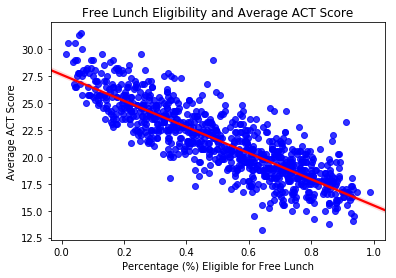

In [205]:
# Plot
sns.regplot(df['Percent (%) \nEligible Free \n(K-12)'], df['AvgScrTotal'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Free Lunch Eligibility and Average ACT Score')
plt.xlabel('Percentage (%) Eligible for Free Lunch')
plt.ylabel('Average ACT Score')
plt.show()

C:\Users\Fan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Fan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.05, 'Correlation between Free Lunch Eligibility and Average ACT Score')

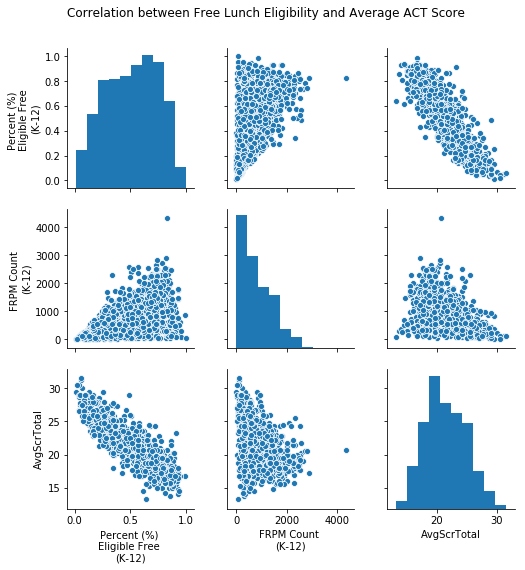

In [206]:
g = sns.pairplot(df[[
       'Percent (%) \nEligible Free \n(K-12)', 'FRPM Count \n(K-12)', 'AvgScrTotal']])
g.fig.suptitle('Correlation between Free Lunch Eligibility and Average ACT Score', y = 1.05)

In [ ]:
later relationships to compare / develop visualizations / model and predict:
    - act scores and graduation rate
    - act scores and diploma rate
    - FRPM rate and graduation rate
    - act scores and drop out rate
    - FRPM rate and drop out rate
    - graduation rate and drop out rate

In [207]:
df["Met UC/CSU Grad Req's (Rate)"]

0         100.0
56        100.0
100        68.9
220        72.1
288        65.8
340        74.2
404        43.3
472        34.8
528        79.4
592        67.4
652        52.4
12172      92.1
12232      57.6
13192      94.1
13240     100.0
13296      24.2
13364      54.1
13432      48.3
13500      47.9
13700      62.4
13768      41.8
13924      64.9
13992      92.9
14040     100.0
14092       0.0
14136      70.4
14196     100.0
14248     100.0
14508      42.2
14572      51.1
          ...  
148640     48.7
148728     32.0
148840     54.5
148884     58.6
148936      4.1
148992     64.3
149048     51.1
149108     42.0
149172     45.5
149240     55.8
149308     45.9
149376     58.0
149436     55.3
149496     45.6
149564     94.9
149628     86.7
149696     46.7
149764     75.8
149824     69.2
149888     64.0
149952     86.0
150008     65.4
150072     43.0
150120     67.9
150168     55.2
150232     38.0
150292     27.6
150360     36.8
150428     35.8
150496     44.8
Name: Met UC/CSU Grad Re